In [106]:
from BeautifulSoup import BeautifulSoup
import urllib2
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
pageFile = urllib2.urlopen("http://www.regentsparkraces.org/results.php?RaceYear=2017&Race=3")

In [3]:
pageHtml = pageFile.read()

In [49]:
pageFile.close()

In [59]:
soup = BeautifulSoup("".join(pageHtml))

In [63]:
table = soup.find("table", { "class" : "ResultsTable" })

In [139]:
titles = 3
header = 3

for i,row in enumerate(table.findAll("tr")): 
    columns = row.findAll("td")
    if(i < titles):
        for c in columns:
            print(c.getText())
    elif(i == header):
        clmn = []
        for c in columns:
            clmn.append(c.getText())
        df = pd.DataFrame(columns = clmn,
                          index =range(0,1000))
    else:
        for j,c in enumerate(columns):
            df.iat[i-header,j] = c.text.replace('&nbsp;', '')

df.head(5)

Regent's Park Races
Regents Park Summer 10K Series Sunday July 2nd 2017
Overall Finish List


,Place,Name,Bib No,Gun Time,Net Time,Category,Categ Pos,Gender,Gender Pos,Club,Lap 1 Time,Lap 2 Time,Lap 3 Time
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Steve Woolley,2303,00:34:37.0,00:34:33,Senior,1,Male,1,West 4 Harriers,00:11:17,00:11:42,00:11:36
2,2,Ben Alexander,1300,00:34:45.0,00:34:41,Senior,2,Male,2,,00:11:17,00:11:43,00:11:43
3,3,Ben Crabb,863,00:34:47.0,00:34:43,V40,1,Male,3,,00:11:21,00:11:38,00:11:46
4,4,Scott Mitchell,2046,00:35:16.0,00:35:15,Senior,3,Male,4,,00:11:18,00:11:54,00:12:02


In [140]:
df = df[df['Place'] != '0']
df = df.dropna(axis=0, how='all')

In [141]:
 # Convert to int if possible
for col in df:
    try:
        df[col] = df[col].astype(int)
    except ValueError:
        pass

In [145]:
# convert to date time
cols = ['Gun Time']

for c in cols:
    df[c] = pd.to_datetime(df[c])

In [148]:
df.head(3)

,Place,Name,Bib No,Gun Time,Net Time,Category,Categ Pos,Gender,Gender Pos,Club,Lap 1 Time,Lap 2 Time,Lap 3 Time
1,1,Steve Woolley,2303,2017-11-10 00:34:37,00:34:33,Senior,1,Male,1,West 4 Harriers,00:11:17,00:11:42,00:11:36
2,2,Ben Alexander,1300,2017-11-10 00:34:45,00:34:41,Senior,2,Male,2,,00:11:17,00:11:43,00:11:43
3,3,Ben Crabb,863,2017-11-10 00:34:47,00:34:43,V40,1,Male,3,,00:11:21,00:11:38,00:11:46


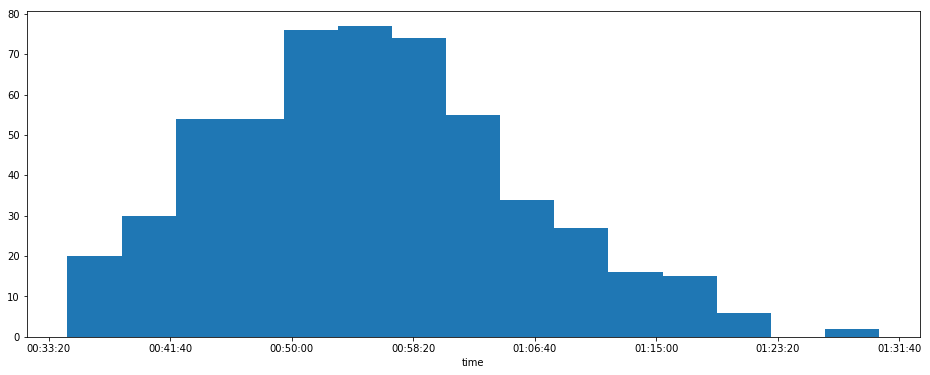

In [231]:
# Plot histogram of time
plt.figure(figsize=(16,6))
plt.grid(False)
df['Gun Time'].dt.time.hist(bins=15,grid =False)

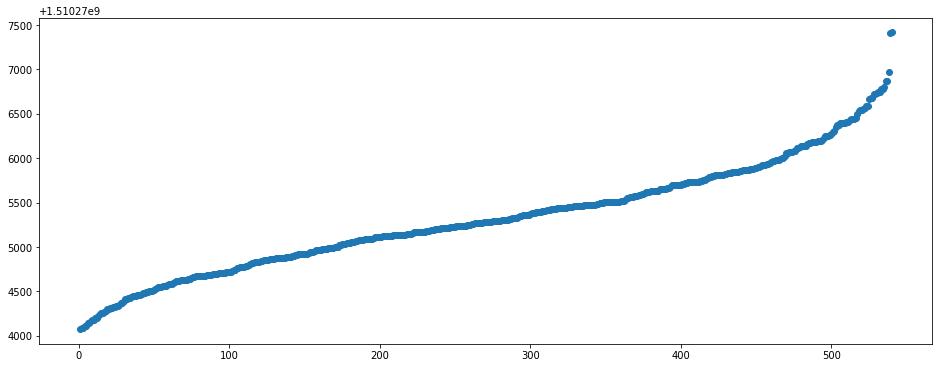

In [232]:
# Place vs time
plt.figure(figsize=(16,6))
plt.scatter(df['Place'], (1e-9*df['Gun Time'].astype(int)))